--2025-06-08 06:49:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spam.zip’

spam.zip                [   <=>              ] 198.65K   385KB/s    in 0.5s    

2025-06-08 06:49:35 (385 KB/s) - ‘spam.zip’ saved [203415]

Archive:  spam.zip
  inflating: SMSSpamCollection       
  inflating: readme                  
Sample Data:


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Training samples: 4457, Testing samples: 1115
Number of features: 7473

Accuracy: 0.9785

Confusion Matrix:
[[966   0]
 [ 24 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



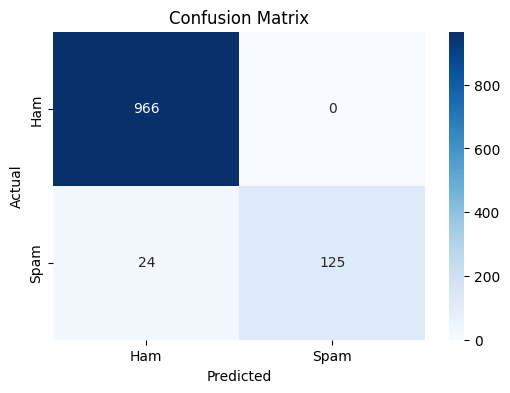


Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Not Spam

Message: You have been selected for a chance to get a free iPhone. Call now!
Prediction: Not Spam


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='label', y='message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
# Spam Email Detection using Naive Bayes and Scikit-learn

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
# Download dataset from: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
!wget -O spam.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip -o spam.zip
df = pd.read_csv('SMSSpamCollection', sep='\t', encoding='latin-1', header=None, names=['label', 'message'])


# Step 3: Data Preprocessing
# Map 'ham' to 0 and 'spam' to 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Show data sample
print("Sample Data:")
display(df.head())

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Step 5: Feature Extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Number of features: {X_train_tfidf.shape[1]}")

# Step 6: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Predict on new samples
samples = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hey, are we still meeting for lunch today?",
    "You have been selected for a chance to get a free iPhone. Call now!"
]

samples_tfidf = vectorizer.transform(samples)
predictions = model.predict(samples_tfidf)

for msg, pred in zip(samples, predictions):
    print(f"\nMessage: {msg}\nPrediction: {'Spam' if pred == 1 else 'Not Spam'}")